In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data , train_labels) , (test_data, test_labels) = fashion_mnist.load_data()
train_data_normalized = train_data / 255
test_data_normalized = test_data / 255

In [3]:
from gc import callbacks
from msilib.schema import _Validation


tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(4,activation = "relu"),
        tf.keras.layers.Dense(4,activation = "relu"),
        tf.keras.layers.Dense(10,activation = "softmax")
    ])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = "adam",metrics = ["accuracy"])
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))
lr_history = model.fit(train_data_normalized,train_labels,epochs = 40,validation_data = (test_data_normalized,test_labels),callbacks = [lr_sheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0291 - accuracy: 0.6485 - val_loss: 0.6916 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6361 - accuracy: 0.7753 - val_loss: 0.6383 - val_accuracy: 0.7810 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5935 - accuracy: 0.7907 - val_loss: 0.6278 - val_accuracy: 0.7779 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7966 - val_loss: 0.6105 - val_accuracy: 0.7878 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5653 - accuracy: 0.7987 - val_loss: 0.6046 - val_accuracy: 0.7904 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8021 - val_loss: 0.5915 - val_accuracy: 0.7942 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

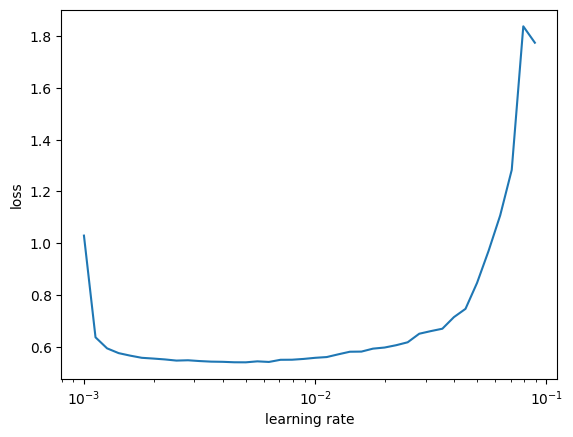

In [4]:
lrs = 1e-3 * 10 **(tf.range(40)/20)
plt.semilogx(lrs,lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.show()


In [5]:
## 1e-3 is the ideal learning rate

In [6]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(4,activation = "relu"),
        tf.keras.layers.Dense(4,activation = "relu"),
        tf.keras.layers.Dense(10,activation = "softmax"),
    ])
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = "adam",metrics = ["accuracy"])
history = model_2.fit(train_data_normalized,train_labels,epochs = 40,validation_data=(test_data_normalized,test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0291 - accuracy: 0.6485 - val_loss: 0.6916 - val_accuracy: 0.7598
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6371 - accuracy: 0.7748 - val_loss: 0.6390 - val_accuracy: 0.7814
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5943 - accuracy: 0.7907 - val_loss: 0.6250 - val_accuracy: 0.7786
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5751 - accuracy: 0.7975 - val_loss: 0.6067 - val_accuracy: 0.7890
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8009 - val_loss: 0.6149 - val_accuracy: 0.7884
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8045 - val_loss: 0.5855 - val_accuracy: 0.7929
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5487 - accuracy: 0.8061 - val_loss: 0.6083 - val_accuracy:

<AxesSubplot:>

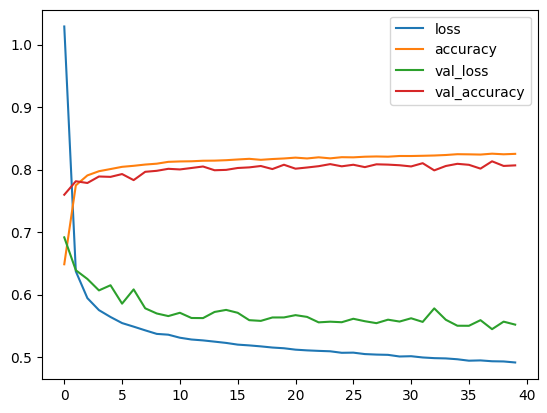

In [7]:
pd.DataFrame(history.history).plot()

In [8]:
y_pred = model_2.predict(test_data_normalized)
y_pred = y_pred.argmax(axis = 1)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_pred)

313/313 [==============================] - 0s 962us/step


array([[833,  13,  10,  54,   3,   2,  73,   0,  12,   0],
       [  7, 949,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 40,   1, 597,   7, 166,   1, 174,   0,  14,   0],
       [ 72,  22,   7, 794,  35,   1,  58,   2,   8,   1],
       [  2,   1,  84,  26, 732,   0, 150,   0,   5,   0],
       [  0,   1,   0,   0,   0, 942,   0,  34,   2,  21],
       [216,   7, 114,  37, 101,   3, 507,   0,  15,   0],
       [  0,   0,   0,   0,   0,  70,   0, 904,   0,  26],
       [ 16,   1,  33,  20,   4,   9,   9,   5, 903,   0],
       [  0,   0,   0,   0,   1,  39,   0,  50,   3, 907]], dtype=int64)

In [10]:
def make_confusin_matrix(y_true,y_pred,classes =None,figsize = (10,10),text_size = 15):
    import itertools
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true,tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis = 1)[:,np.newaxis]
    n_classes = cm.shape[0]

    fig,ax = plt.subplots(figsize = figsize)
    cax = ax.matshow(cm,cmap = plt.cm.Blues)
    fig.colorbar(cax)

    if(classes):
        labels = classes
    else:
        labels = np.arrange(cm.shape[0])

    ax.set(title = "Confusion_Matrix",xlabel = "Predicted_Label",ylabel = "True_Lables",xticks = np.arange(n_classes),yticks = np.arange(n_classes),xticklabels = labels,yticklabels = labels)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    
    threshold = (cm.max() + cm.min()) / 2.

    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])): 
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",horizontalalignment = "center",color = "white" if cm[i,j] > threshold else "black",size = text_size)

In [11]:
class_names = ["tshirt","trouser","pullover","dress", "coat","sandal","shirt","sneaker","bag","ankle boot"]

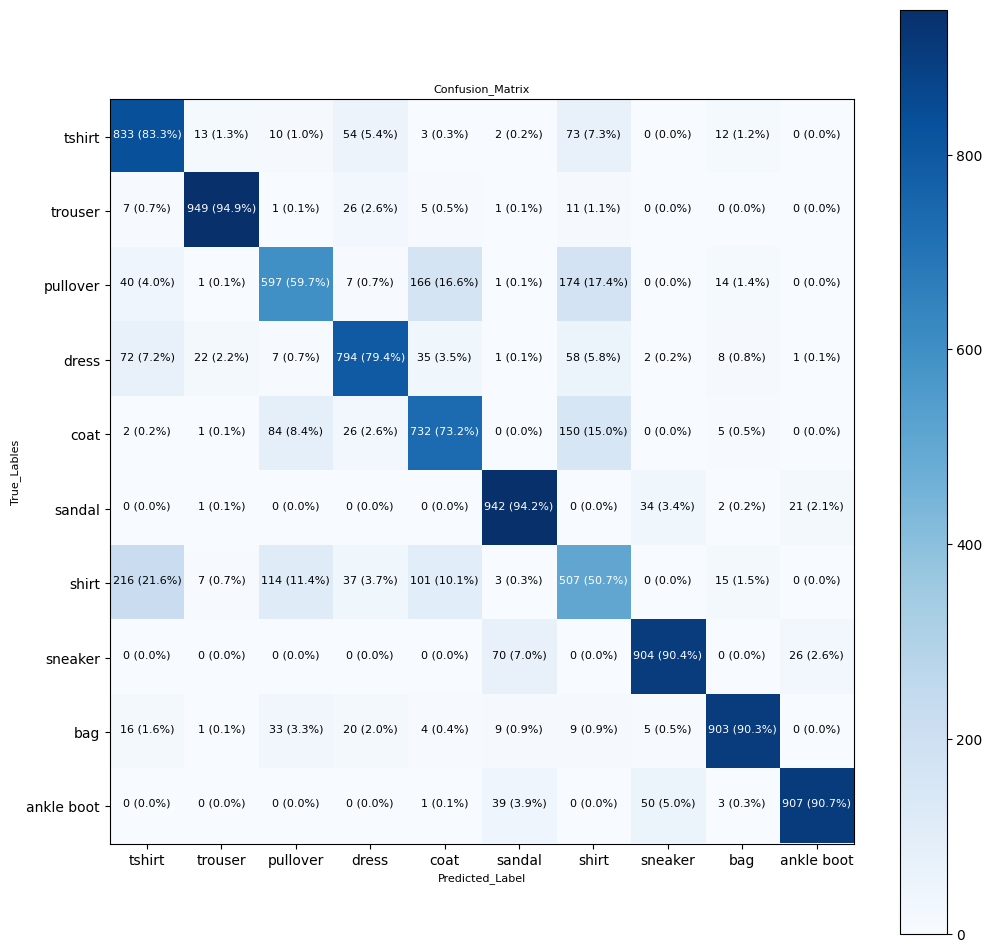

In [18]:
make_confusin_matrix(y_true = test_labels , y_pred=y_pred,classes = class_names,figsize = (12,12),text_size = 8)

In [13]:
def plot_random_image(model,images,true_labels,classes):
    import random
    i = random.randint(0,len(images))

    target_image = images[i]
    pred_prob = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_prob.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image,cmap = plt.cm.binary)

    if(pred_label == true_label):
        color = "green"
    else : 
        color = "red"

    plt.xlabel("pred: {} {:2.0f}% (True : {})".format(pred_label,100*tf.reduce_max(pred_prob),true_label),color = color)


1/1 [==============================] - 0s 12ms/step


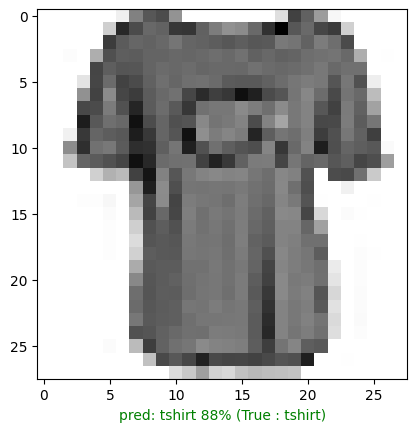

In [14]:
plot_random_image(model = model_2 , images = test_data_normalized , true_labels = test_labels,classes = class_names)

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
